# Processamento de Linguagem Natural

Membros do grupo: Beatriz Barreto, Maria Eduarda Bandeira, Yhasmim Tigre.


## Algoritmo de extração do Projeto MuPE + SoTaTok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
users_list = ['gleicidamascenofc', 'silvamaxine', 'raissabarbosa', 'jessicaingrede', 'rogeriarocha8']

In [ ]:
state_user_map = {
            'AM': ['jandersonopeixeiro', 'cunhaporanga_oficial', 'amorimvivianoficial', 'weenatikuna'],
            'RR': ['mariwapichana', 'mariliatavaresoficial', 'humakimak', 'sonjachacon0', 'karola.marreiro'],
            'AC': ['gleicidamascenofc', 'silvamaxine', 'raissabarbosa', 'rogeriarocha8', 'Juhvellegas', 'iasmynesampaio'],
            'TO': ['paulovieirareal', 'franadornooficial', 'helionerocha', 'olaviosoares', 'lannabrittoo', 'felipefragaa'],
            'MT': ['gi_robatini', 'wendellcarvalhooficial', 'bellacampox', 'danubialauro'],
            'SC': ['doarda', 'rodrigo.hilbert', 'euumirellasantos'],
            'GO': ['camilapudim', 'bomtalvao', 'harianyoficial', 'carolinaferrazoficial'],
            'MA': ['manoelgomesbr', 'sobrevivente13', 'euradijapereira'],
            'RN': ['ivanvbaron', 'talokudo', 'claudiiaoficial']
        }

In [ ]:
state_user_map = {
            #'RR': ['mariwapichana', 'mariliatavaresoficial', 'humakimak', 'sonjachacon0', 'karola.marreiro'],
            #'SC': ['doarda', 'rodrigo.hilbert', 'euumirellasantos'],
            'GO': ['camilapudim', 'bomtalvao', 'harianyoficial', 'carolinaferrazoficial']
        }

In [ ]:
state_user_map = {
            'AC': ['eoacre', 'ianafreitass', 'leidy.paulino5'],
            'TO': ['fabionettoo', 'catyury', 'joaogabrielpdb', 'tabocaodemel'],
            'MT': ['xomana_oficial', 'omatogrossensemt', 'amdscamelo']
        }

In [ ]:
from TikTokApi import TikTokApi
import asyncio

# Inicializa a API
# The get_instance() method is deprecated or removed in recent versions.
# Initialize the API directly as an async context manager.

async def get_user_videos_tiktokapi(username, max_results=10):
    async with TikTokApi() as api:

        await api.create_sessions(num_sessions=1, headless=True)

        # Pegue vídeos do usuário
        try:
            user_obj = api.user(username=username)
            video_urls = []
            async for video in user_obj.videos(count=max_results):
                # The object returned by the iterator is a Video object.
                # Based on the print output, it seems to have an 'id' attribute.
                try:
                    video_id = video.id
                    # Construct the URL with only the ID
                    video_url = f"https://www.tiktok.com/@{username}/video/{video_id}"
                    video_urls.append(video_url)
                except AttributeError:
                    print(f"Could not get ID from video object: {video}")


        except Exception as e:
            print(f"Error fetching user videos with TikTokApi: {e}")
            return []
        # Não utilizar api.close()

        return video_urls

video_list = []
users_list_updated = [] # Create a new list to store all users from the map

# Function to get videos for a specific state
async def get_videos_for_state(state_abbr, state_user_map):
    videos_for_state = []
    users_for_state = []
    if state_abbr in state_user_map:
        users_in_state = state_user_map[state_abbr]
        for username in users_in_state:
            print(f"Fetching videos for user: {username} in state {state_abbr}")
            videos = await get_user_videos_tiktokapi(username, max_results=10)

            # Exibir os vídeos encontrados
            urls = []
            if videos:
                print("Vídeos encontrados e adicionados a lista!")
                for video in videos:
                    print(video)
                    urls.append(video)
            else:
                print("Nenhum vídeo encontrado usando TikTokApi para o usuário", username)
            videos_for_state.append(urls)
            users_for_state.append(username) # Add user to the updated list
    else:
        print(f"State abbreviation '{state_abbr}' not found in the map.")
    return users_for_state, videos_for_state

# Update this part to iterate through all states in the state_user_map
all_users_list = []
all_video_list = []

for state in state_user_map.keys():
    users_for_state, videos_for_state = await get_videos_for_state(state, state_user_map)
    all_users_list.extend(users_for_state)
    all_video_list.extend(videos_for_state)


print("Users list:", all_users_list)
print("Videos list:", all_video_list)

users_list = all_users_list
video_list = all_video_list

Fetching videos for user: eoacre in state AC
Error fetching user videos with TikTokApi: None -> TikTok returned an empty response. They are detecting you're a bot, try some of these: headless=False, browser='webkit', consider using a proxy
Nenhum vídeo encontrado usando TikTokApi para o usuário eoacre
Fetching videos for user: ianafreitass in state AC
Vídeos encontrados e adicionados a lista!
https://www.tiktok.com/@ianafreitass/video/7555537881901665592
https://www.tiktok.com/@ianafreitass/video/7555311692192828683
https://www.tiktok.com/@ianafreitass/video/7555306266982124811
https://www.tiktok.com/@ianafreitass/video/7554903290153127180
https://www.tiktok.com/@ianafreitass/video/7554101578731359544
https://www.tiktok.com/@ianafreitass/video/7553987214460374328
https://www.tiktok.com/@ianafreitass/video/7553406185563524408
https://www.tiktok.com/@ianafreitass/video/7553009365649788171
https://www.tiktok.com/@ianafreitass/video/7552638781225045304
https://www.tiktok.com/@ianafreitass/

## Cortando os áudios

## Extração dos vídeos

Região Norte:

**Amazonas**, Pará, **Roraima**, **Amapá**, Rondônia, **Acre** e **Tocantins**.


---


Região Nordeste:

Piauí, **Maranhão**, Pernambuco, **Rio Grande do Norte**, Paraíba, Ceará, Bahia, Alagoas e Sergipe.


---


Região Centro-Oeste:

**Mato Grosso**, Mato Grosso do Sul e Goiás.


---


Região Sudeste:

São Paulo, Rio de Janeiro, Espírito Santo e Minas Gerais.


---


Região Sul:

Rio Grande do Sul, Paraná e **Santa Catarina**.


In [ ]:
dic_tik = dict(zip(users_list, video_list))
print(dic_tik)

{'eoacre': [], 'ianafreitass': ['https://www.tiktok.com/@ianafreitass/video/7555537881901665592', 'https://www.tiktok.com/@ianafreitass/video/7555311692192828683', 'https://www.tiktok.com/@ianafreitass/video/7555306266982124811', 'https://www.tiktok.com/@ianafreitass/video/7554903290153127180', 'https://www.tiktok.com/@ianafreitass/video/7554101578731359544', 'https://www.tiktok.com/@ianafreitass/video/7553987214460374328', 'https://www.tiktok.com/@ianafreitass/video/7553406185563524408', 'https://www.tiktok.com/@ianafreitass/video/7553009365649788171', 'https://www.tiktok.com/@ianafreitass/video/7552638781225045304', 'https://www.tiktok.com/@ianafreitass/video/7552616224002264376', 'https://www.tiktok.com/@ianafreitass/video/7552281039557774603', 'https://www.tiktok.com/@ianafreitass/video/7551936744598359308', 'https://www.tiktok.com/@ianafreitass/video/7551181990842748165', 'https://www.tiktok.com/@ianafreitass/video/7550828746144484614', 'https://www.tiktok.com/@ianafreitass/video/

In [ ]:
import asyncio
import json
import os

from pytok.tiktok import PyTok
from moviepy.editor import VideoFileClip

async def extracao(dic_tik, state_abbr):
    async with PyTok(headless=True) as api:
        # Define the base directory in your Google Drive
        base_drive_path = '/content/drive/MyDrive/Tiktok_audios_filtrados'

        # Define a dictionary to map states to users (keep this for user_state_map)
        state_user_map = {
            'AM': ['jandersonopeixeiro', 'cunhaporanga_oficial', 'amorimvivianoficial', 'weenatikuna', 'diariasdogui'],
            'RR': ['mariwapichana', 'mariliatavaresoficial', 'humakimak', 'sonjachacon0', 'laisrams'],
            'AC': ['gleicidamascenofc', 'silvamaxine', 'raissabarbosa', 'jessicaingrede', 'rogeriarocha8', 'eoacre', 'ianafreitass', 'leidy.paulino5'],
            'TO': ['paulovieirareal', 'alessandraaraujoof', 'franadornooficial', 'helionerocha', 'olaviosoares', 'fabionettoo', 'catyury', 'joaogabrielpdb', 'tabocaodemel'],
            'MT': ['gi_robatini', 'wendellcarvalhooficial', 'bellacampox', 'iamjakelyne', 'danubialauro', 'xomana_oficial', 'omatogrossensemt', 'amdscamelo'],
            'SC': ['brunapgo', 'doarda', 'rodrigo.hilbert', 'cellbitlives', 'euumirellasantos'],
            'GO': ['camilapudim', 'bomtalvao', 'harianyoficial', 'andressasuita', 'carolinaferrazoficial'],
            'MA': ['manoelgomesbr', 'sobrevivente13', 'euradijapereira', 'thaynaraog', 'romuloestrela', 'joaoferdnan'],
            'RN': ['tiagodionisio', 'ivanvbaron', 'laurinha', 'talokudo', 'claudiiaoficial']
        }


        # Create a reverse map for easier lookup
        user_state_map = {}
        for state, users in state_user_map.items():
            for user in users:
                user_state_map[user] = state

        # Filter dic_tik to include only users from the specified state
        filtered_dic_tik = {user: urls for user, urls in dic_tik.items() if user in state_user_map.get(state_abbr, [])}


        for user, urls in filtered_dic_tik.items():
            if user in user_state_map:
                # Only create folder if there are URLs for the user
                if urls:
                    state = user_state_map[user]
                    user_folder = os.path.join(base_drive_path, f"{state}_{user}")
                    os.makedirs(user_folder, exist_ok=True) # Create user folder if it doesn't exist

                    for i, url in enumerate(urls):
                        video = api.video(username=user, url=url)

                        try:
                            video_data = await video.info()

                            # Check if audio title is 'som original'
                            if video_data.get("music", {}).get("title", "") == 'som original':
                                video_bytes = await video.bytes()

                                # Define the filename for the video (temporary) and audio
                                video_filename_temp = f"{state}_{user}_{i+1:03d}_temp.mp4"
                                video_filepath_temp = os.path.join(user_folder, video_filename_temp)
                                audio_filename = f"{state}_{user}_{i+1:03d}.mp3"
                                audio_filepath = os.path.join(user_folder, audio_filename)


                                # Save the video temporarily
                                with open(video_filepath_temp, "wb") as out_file:
                                    out_file.write(video_bytes)

                                # Extract audio using moviepy
                                try:
                                    clip = VideoFileClip(video_filepath_temp)
                                    audio_clip = clip.audio
                                    audio_clip.write_audiofile(audio_filepath)
                                    print(f"Downloaded and saved audio: {audio_filename}")

                                    # Close the clips
                                    audio_clip.close()
                                    clip.close()

                                    # Remove the temporary video file
                                    os.remove(video_filepath_temp)

                                except Exception as moviepy_e:
                                    print(f"Error extracting audio with moviepy for {url}: {moviepy_e}")
                                    if os.path.exists(video_filepath_temp):
                                        os.remove(video_filepath_temp) # Clean up temporary file

                                # Save info JSON as well
                                info_filename = f"{state}_{user}_{i+1:03d}.json"
                                info_filepath = os.path.join(user_folder, info_filename)
                                with open(info_filepath, "w") as out_file:
                                    json.dump(video_data, out_file)
                            else:
                                print(f"Skipping video {url} for user {user}: not original audio.")

                        except Exception as e:
                          print(f"Error processing video {url} for user {user}: {e}")


                else:
                    print(f"No videos found for user: {user}. Skipping folder creation.")

            else:
                print(f"No state found for user: {user}. Skipping.")


# Iterate through all states in state_user_map and call extracao for each
for state_to_extract in state_user_map.keys():
    await extracao(dic_tik, state_to_extract)

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



No videos found for user: eoacre. Skipping folder creation.
Skipping video https://www.tiktok.com/@ianafreitass/video/7555537881901665592 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_002.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_002.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_003.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_003.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7554903290153127180 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7554101578731359544 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7553987214460374328 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_007.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_007.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7553009365649788171 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_009.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_009.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_010.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_010.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7552281039557774603 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7551936744598359308 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7551181990842748165 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7550828746144484614 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7550450505432960261 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_016.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_017.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_017.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7550065029907893510 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_019.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_019.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_020.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_020.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_021.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_021.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_022.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_022.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7549624814512688389 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7549577206360509702 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7548665898320579896 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7548575507198102840 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_027.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_027.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7547869710294011192 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_029.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_030.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_030.mp3
Skipping video https://www.tiktok.com/@ianafreitass/video/7546779427225537798 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7546035293174926648 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7545630450874715397 for user ianafreitass: not original audio.
Skipping video https://www.tiktok.com/@ianafreitass/video/7545231545523588358 for user ianafreitass: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/AC_ianafreitass/AC_ianafreitass_035.mp3


MoviePy - Done.
Downloaded and saved audio: AC_ianafreitass_035.mp3
No videos found for user: leidy.paulino5. Skipping folder creation.
No videos found for user: fabionettoo. Skipping folder creation.
No videos found for user: catyury. Skipping folder creation.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_001.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_001.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7446084009680997638 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_003.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_003.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7553410391943007500 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7551780767379262731 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7551183337629568312 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7550445612500651320 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7550400023171812614 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_009.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_009.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7549554101709786374 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7548851910892113157 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7547709941839170821 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_013.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_013.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_014.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_014.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_015.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_015.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_016.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_017.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_017.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7537447603483495686 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7536570779266206982 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7530404456744127749 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7529633509154114872 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_022.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_022.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7525418218589310213 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_024.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_024.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7523994533781064966 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7521410394867387653 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7520979705370021176 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7520062390570880262 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_029.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_030.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_030.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_031.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_031.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_032.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_032.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7515941546118630662 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_034.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_034.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_joaogabrielpdb/TO_joaogabrielpdb_035.mp3


MoviePy - Done.
Downloaded and saved audio: TO_joaogabrielpdb_035.mp3
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7514700503717121286 for user joaogabrielpdb: not original audio.
Skipping video https://www.tiktok.com/@joaogabrielpdb/video/7514319432575880504 for user joaogabrielpdb: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_001.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_001.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_002.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_002.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_003.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_003.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_004.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_004.mp3
Error processing video https://www.tiktok.com/@tabocaodemel/video/7518925756202847544 for user tabocaodemel: ('Connection broken: IncompleteRead(20675285 bytes read, 3609816 more expected)', IncompleteRead(20675285 bytes read, 3609816 more expected))
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_006.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_006.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_007.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_007.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_008.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_008.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_009.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_009.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_010.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_010.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_011.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_011.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_012.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_012.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_013.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_013.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_014.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_014.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_015.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_015.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_016.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_017.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_017.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_018.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_018.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_019.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_019.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_020.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_020.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_021.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_021.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_022.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_022.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_023.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_023.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_024.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_024.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_025.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_025.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_026.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_026.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_027.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_027.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_028.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_028.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_029.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_030.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_030.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_031.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_031.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_032.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_032.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/TO_tabocaodemel/TO_tabocaodemel_033.mp3


MoviePy - Done.
Downloaded and saved audio: TO_tabocaodemel_033.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_001.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_001.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_002.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_002.mp3
Error extracting audio with moviepy for https://www.tiktok.com/@xomana_oficial/video/7396754591112563974: MoviePy error: failed to read the duration of file /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_003_temp.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 7.0.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspe

MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_005.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_006.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_006.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_007.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_007.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_008.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_008.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7553454976043896076 for user xomana_oficial: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_010.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_010.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_011.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_011.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_012.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_012.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7551438022781308172 for user xomana_oficial: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_014.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_014.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_015.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_015.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_016.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_016.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7548430868663127302 for user xomana_oficial: not original audio.
Skipping video https://www.tiktok.com/@xomana_oficial/video/7548222660157656376 for user xomana_oficial: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_019.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_019.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7548218935385099526 for user xomana_oficial: not original audio.
Skipping video https://www.tiktok.com/@xomana_oficial/video/7548218622401973560 for user xomana_oficial: not original audio.
Error processing video https://www.tiktok.com/@xomana_oficial/video/7547848994580368696 for user xomana_oficial: Post does not have a video
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_023.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_023.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_024.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_024.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_025.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_025.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_026.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_026.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_027.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_027.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_028.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_028.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_029.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_030.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_030.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_031.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_031.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7541725596208991494 for user xomana_oficial: not original audio.
Skipping video https://www.tiktok.com/@xomana_oficial/video/7541185959186992389 for user xomana_oficial: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_034.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_034.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_xomana_oficial/MT_xomana_oficial_035.mp3


MoviePy - Done.
Downloaded and saved audio: MT_xomana_oficial_035.mp3
Skipping video https://www.tiktok.com/@xomana_oficial/video/7540639700709674246 for user xomana_oficial: not original audio.
Skipping video https://www.tiktok.com/@xomana_oficial/video/7539645022774349061 for user xomana_oficial: not original audio.
No videos found for user: omatogrossensemt. Skipping folder creation.
Skipping video https://www.tiktok.com/@amdscamelo/video/7189294967209135366 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7526596681228471557 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7525939872423578886 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7522566070276771077 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7521017423181499654 for user amdscamelo: not original audio.
MoviePy - Writing audio i

MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_006.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_007.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_007.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_008.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_008.mp3
Skipping video https://www.tiktok.com/@amdscamelo/video/7474616214459862277 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7444702333230992695 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7439014780809055544 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7418568081431268614 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7418181168085880069 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7414158049562152197 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7411939009292717317 for user amdscamelo: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_016.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_017.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_017.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_018.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_018.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_019.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_019.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_020.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_020.mp3
Error extracting audio with moviepy for https://www.tiktok.com/@amdscamelo/video/7384412168080411910: MoviePy error: failed to read the duration of file /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_021_temp.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 7.0.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libs

MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_022.mp3
Skipping video https://www.tiktok.com/@amdscamelo/video/7371420215596338438 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7371056615883099398 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7369625607837093125 for user amdscamelo: not original audio.
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_026.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_026.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/MT_amdscamelo/MT_amdscamelo_027.mp3


MoviePy - Done.
Downloaded and saved audio: MT_amdscamelo_027.mp3
Skipping video https://www.tiktok.com/@amdscamelo/video/7365960442277039366 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7364787410397416710 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7359183115585146117 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7357729283147599109 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7353265487633026310 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7340274126650641670 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7339929782861253894 for user amdscamelo: not original audio.
Skipping video https://www.tiktok.com/@amdscamelo/video/7328414145244695813 for user amdscamelo: not original audio

In [ ]:
cellbitlives = ['https://www.tiktok.com/@cellbitlives/video/7553461249497992459', 'https://www.tiktok.com/@cellbitlives/video/7552351714641251596', 'https://www.tiktok.com/@cellbitlives/video/7551589010280287500', 'https://www.tiktok.com/@cellbitlives/video/7550848096394104070', 'https://www.tiktok.com/@cellbitlives/video/7549360959240899896', 'https://www.tiktok.com/@cellbitlives/video/7549012641574899000', 'https://www.tiktok.com/@cellbitlives/video/7548620064606473477', 'https://www.tiktok.com/@cellbitlives/video/7548270117054942520', 'https://www.tiktok.com/@cellbitlives/video/7547908566229929221', 'https://www.tiktok.com/@cellbitlives/video/7547525403729055032', 'https://www.tiktok.com/@cellbitlives/video/7531932536117775621', 'https://www.tiktok.com/@cellbitlives/video/7530837419403316485', 'https://www.tiktok.com/@cellbitlives/video/7530083936987270456', 'https://www.tiktok.com/@cellbitlives/video/7529714892106943800', 'https://www.tiktok.com/@cellbitlives/video/7529355611482361093', 'https://www.tiktok.com/@cellbitlives/video/7528229400479911174', 'https://www.tiktok.com/@cellbitlives/video/7527841444598517048', 'https://www.tiktok.com/@cellbitlives/video/7527482751893753094', 'https://www.tiktok.com/@cellbitlives/video/7527132246273314053', 'https://www.tiktok.com/@cellbitlives/video/7526378595871214904', 'https://www.tiktok.com/@cellbitlives/video/7525629491578817797', 'https://www.tiktok.com/@cellbitlives/video/7525257340258389253', 'https://www.tiktok.com/@cellbitlives/video/7524892630136687928', 'https://www.tiktok.com/@cellbitlives/video/7524535518739172664', 'https://www.tiktok.com/@cellbitlives/video/7524167497931705605', 'https://www.tiktok.com/@cellbitlives/video/7523379069526854968', 'https://www.tiktok.com/@cellbitlives/video/7522659573627374853', 'https://www.tiktok.com/@cellbitlives/video/7522578487287319813', 'https://www.tiktok.com/@cellbitlives/video/7522286413992217861', 'https://www.tiktok.com/@cellbitlives/video/7521914907126664453', 'https://www.tiktok.com/@cellbitlives/video/7521463694090308869', 'https://www.tiktok.com/@cellbitlives/video/7521180315201604920', 'https://www.tiktok.com/@cellbitlives/video/7520823544557604152', 'https://www.tiktok.com/@cellbitlives/video/7520453280837766406', 'https://www.tiktok.com/@cellbitlives/video/7520081829819354374']

In [ ]:
import asyncio
import json
import os

from pytok.tiktok import PyTok
from moviepy.editor import VideoFileClip

async def extracao_por_links(links):
    async with PyTok(headless=True) as api:
        # Define a base path para o Google Drive
        base_drive_path = '/content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives'

        for i, url in enumerate(links):
            try:
                # Obter o vídeo usando o link fornecido
                video = api.video(url=url)

                video_data = await video.info()

                video_bytes = await video.bytes()

                # Definir nome de arquivo para o vídeo temporário e áudio
                video_filename_temp = f"temp_video.mp4"
                video_filepath_temp = os.path.join(base_drive_path, video_filename_temp)
                audio_filename = f"SC_cellbitlives_{i+1:03d}.mp3"
                audio_filepath = os.path.join(base_drive_path, audio_filename)

                # Salvar o vídeo temporariamente
                with open(video_filepath_temp, "wb") as out_file:
                    out_file.write(video_bytes)

                # Extrair o áudio usando moviepy
                try:
                    clip = VideoFileClip(video_filepath_temp)
                    audio_clip = clip.audio
                    audio_clip.write_audiofile(audio_filepath)
                    print(f"Download e áudio extraído com sucesso: {audio_filename}")

                    # Fechar os clips
                    audio_clip.close()
                    clip.close()

                    # Remover o arquivo temporário do vídeo
                    os.remove(video_filepath_temp)

                except Exception as moviepy_e:
                    print(f"Erro ao extrair áudio com moviepy para {url}: {moviepy_e}")
                    if os.path.exists(video_filepath_temp):
                        os.remove(video_filepath_temp)  # Limpar o arquivo temporário

                # Salvar as informações em formato JSON
                info_filename = f"SC_cellbitlives_{i+1:03d}.json"
                info_filepath = os.path.join(base_drive_path, info_filename)
                with open(info_filepath, "w") as out_file:
                    json.dump(video_data, out_file)

            except Exception as e:
                print(f"Erro ao processar vídeo {url}: {e}")

# Chamada da função com a lista de links específicos
await extracao_por_links(cellbitlives)

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=Exception('Connection closed while reading from the driver')>
Exception: Connection closed while reading from the driver
ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=TargetClosedError('Target page, context or browser has been closed\nCall log:\n  - navigating to "https://www.tiktok.com/@cellbitlives/video/7553461249497992459", waiting until "load"\n')>
patchright._impl._errors.TargetClosedError: Target page, context or browser has been closed
Call log:
  - navigating to "https://www.tiktok.com/@cellbitlives/video/7553461249497992459", waiting until "load"



MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_001.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_001.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_002.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_002.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_003.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_003.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_004.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_004.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_005.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_005.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_006.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_006.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_007.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_007.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_008.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_008.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_009.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_009.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_010.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_010.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_011.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_011.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_012.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_012.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_013.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_013.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_014.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_014.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_015.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_015.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_016.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_017.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_017.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_018.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_018.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_019.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_019.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_020.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_020.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_021.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_021.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_022.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_022.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_023.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_023.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_024.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_024.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_025.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_025.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_026.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_026.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_027.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_027.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_028.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_028.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_029.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_030.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_030.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_031.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_031.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_032.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_032.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_033.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_033.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_034.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_034.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/SC_cellbitlives/SC_cellbitlives_035.mp3


MoviePy - Done.
Download e áudio extraído com sucesso: SC_cellbitlives_035.mp3


In [ ]:
async def extracao_por_pasta(pasta_video):
    base_drive_path = '/content/drive/MyDrive/Tiktok_audios_filtrados'

    # Listar todos os vídeos na pasta
    for video_filename in os.listdir(pasta_video):
        video_filepath = os.path.join(pasta_video, video_filename)

        # Verificar se o arquivo é um vídeo (exemplo: com extensão .mp4)
        if video_filename.endswith('.mp4'):
            try:
                # Processar o vídeo local
                clip = VideoFileClip(video_filepath)
                audio_clip = clip.audio

                # Gerar o nome do arquivo de áudio
                audio_filename = f"{os.path.splitext(video_filename)[0]}.mp3"
                audio_filepath = os.path.join(base_drive_path, audio_filename)

                # Extrair o áudio e salvar
                audio_clip.write_audiofile(audio_filepath)
                print(f"Áudio extraído com sucesso: {audio_filename}")

                # Fechar os clips
                audio_clip.close()
                clip.close()

            except Exception as e:
                print(f"Erro ao processar o vídeo {video_filename}: {e}")
        else:
            print(f"Arquivo {video_filename} não é um vídeo válido. Pulando...")

base_videos_path = '/content/drive/MyDrive/Tiktok_videos/RR_mariwapichana'
await extracao_por_pasta(base_videos_path)

MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_033.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_033.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_032.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_032.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_031.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_031.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_030.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_030.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_027.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_027.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_028.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_028.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_029.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_029.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_026.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_026.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_025.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_025.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_021.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_021.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_022.mp3


Streaming output truncated to the last 5000 lines.
  warnings.warn("Error in file %s, "%(self.filename)+

index 80958 is out of bounds for axis 0 with size 80958
  warnings.warn("Error in file %s, "%(self.filename)+

index 80958 is out of bounds for axis 0 with size 80958
  warnings.warn("Error in file %s, "%(self.filename)+

index 80958 is out of bounds for axis 0 with size 80958
  warnings.warn("Error in file %s, "%(self.filename)+

chunk:  18%|█▊        | 277/1522 [00:01<00:05, 220.06it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/audio/io/readers.py:197: UserWarning: Error in file /content/drive/MyDrive/Tiktok_videos/RR_mariwapichana/RR_mariwapichana_022.mp4, At time t=12.51-12.56 seconds, indices wanted: 80957-82955, but len(buffer)=80958
index 80958 is out of bounds for axis 0 with size 80958
  warnings.warn("Error in file %s, "%(self.filename)+

index 80958 is out of bounds for axis 0 with size 80958
  warnings.warn("Error in file %s, "%(self.f

MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_022.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_019.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_019.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_020.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_020.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_017.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_017.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_018.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_018.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_016.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_016.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_013.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_013.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_014.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_014.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_012.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_012.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_010.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_010.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_011.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_011.mp3
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_001.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_001.mp3
Arquivo RR_mariwapichana_001.json não é um vídeo válido. Pulando...
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_003.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_003.mp3
Arquivo RR_mariwapichana_003.json não é um vídeo válido. Pulando...
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_004.mp3


chunk:   4%|▍         | 51/1215 [00:00<00:02, 485.92it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/audio/io/readers.py:197: UserWarning: Error in file /content/drive/MyDrive/Tiktok_videos/RR_mariwapichana/RR_mariwapichana_004.mp4, At time t=2.27-2.31 seconds, indices wanted: 97337-99336, but len(buffer)=97342
index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self.filename)+

index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self.filename)+

index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self.filename)+

index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self.filename)+

index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self.filename)+

index 97342 is out of bounds for axis 0 with size 97342
  warnings.warn("Error in file %s, "%(self

MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_004.mp3
Arquivo RR_mariwapichana_004.json não é um vídeo válido. Pulando...
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_005.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_005.mp3
Arquivo RR_mariwapichana_005.json não é um vídeo válido. Pulando...
Erro ao processar o vídeo RR_mariwapichana_006.mp4: MoviePy error: failed to read the duration of file /content/drive/MyDrive/Tiktok_videos/RR_mariwapichana/RR_mariwapichana_006.mp4.
Here are the file infos returned by ffmpeg:

ffmpeg version 7.0.2-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex -

MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_007.mp3
Arquivo RR_mariwapichana_007.json não é um vídeo válido. Pulando...
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_008.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_008.mp3
Arquivo RR_mariwapichana_008.json não é um vídeo válido. Pulando...
MoviePy - Writing audio in /content/drive/MyDrive/Tiktok_audios_filtrados/RR_mariwapichana_009.mp3


MoviePy - Done.
Áudio extraído com sucesso: RR_mariwapichana_009.mp3
Arquivo RR_mariwapichana_009.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_010.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_011.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_012.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_013.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_014.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_016.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_017.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_018.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_019.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_020.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_021.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_022.json não é um vídeo válido. Pulando...
Arquivo RR_mariwapichana_025.json não é um víde

In [ ]:
!pip install pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [ ]:
import os
from pydub import AudioSegment, silence
from pydub.exceptions import CouldntDecodeError

base_drive_path = '/content/drive/MyDrive/Tiktok_audios_filtrados'

def cortar_audio_com_base_em_pausas(arquivo_mp3, saida_dir, tamanho_bloco=30000, silencio_threshold=-40, keep_silence_ms=200, min_silencio=1500, max_duracao=20000, min_duracao=10000):

    basename = os.path.splitext(os.path.basename(arquivo_mp3))[0]

    # 🛠 Tenta carregar o áudio
    try:
        audio = AudioSegment.from_file(arquivo_mp3, format="mp3")
    except CouldntDecodeError:
        print(f"⚠ Erro ao abrir: {arquivo_mp3} (arquivo corrompido ou formato inválido)")
        return
    except Exception as e:
        print(f"⚠ Erro inesperado em {arquivo_mp3}: {e}")
        return

    # Detecta intervalos de áudio não silenciosos
    intervals = silence.detect_nonsilent(
        audio,
        min_silence_len=min_silencio,
        silence_thresh=silencio_threshold
    )

    partes = []
    for start, end in intervals:
        if max_duracao and (end - start) > max_duracao:
            partes.append(audio[start:start+max_duracao])
        else:
            partes.append(audio[start:end])

    # Une todas as partes (descarta trechos curtos)
    audio_final = AudioSegment.empty()
    for i, parte in enumerate(partes, start=1):
        if len(parte) < 2_000:  # menor que 2 segundos
            print(f"   ⚠ Descartado no merge: {basename}_parte_{i} ({len(parte)/1000:.2f}s - muito curto)")
            continue
        audio_final += parte + AudioSegment.silent(duration=keep_silence_ms)

    # Salva o resultado final
    arquivo_unido = os.path.join(saida_dir, f"{basename}_sem_silencio.mp3")
    duracao = len(audio_final)
    if duracao > 0:
        audio_final.export(arquivo_unido, format="mp3")
        print(f"   ✔ Arquivo final salvo: {arquivo_unido} ({duracao/1000:.2f}s)")
    else:
        print(f"⚠ Nenhum trecho aproveitável em {arquivo_mp3}")


    # Caso o áudio seja menor ou igual a 30s → mantém
    if duracao <= tamanho_bloco:
        print(f"Áudio {basename} tem {duracao/1000:.2f}s, não será cortado.")
        return

    # Cortando em blocos de 30s
    num_partes = (duracao // tamanho_bloco) + (1 if duracao % tamanho_bloco != 0 else 0)

    for i in range(num_partes):
        start = i * tamanho_bloco
        end = min((i+1) * tamanho_bloco, duracao)
        parte = audio_final[start:end]

        # descarta partes menores que min_duracao
        if len(parte) < min_duracao:
            print(f"Descartando parte {i+1} ({len(parte)/1000:.2f}s) de {basename} por ser < {min_duracao/1000}s")
            continue

        saida_arquivo = os.path.join(saida_dir, f"{basename}_cortefinal_{i+1}.mp3")
        parte.export(saida_arquivo, format="mp3")
        print(f"Exportado: {saida_arquivo} ({len(parte)/1000:.2f}s)")

for root, dirs, files in os.walk(base_drive_path):
    for file in files:
        if not file.endswith('.mp3'):
            continue

        # se já for um arquivo derivado, não processa
        if "_sem_silencio" in file or "_cortefinal" in file:
            continue

        basename = os.path.splitext(file)[0]
        caminho_completo = os.path.join(root, file)

        # checa se já existe um arquivo processado correspondente
        ja_processado = any(
            f.startswith(basename) and ("sem_silencio" in f or "cortefinal" in f)
            for f in files
        )

        if ja_processado:
            # print(f"⏭ Pulando {caminho_completo} (já processado)")
            continue

        print(f"Processando: {caminho_completo}")
        cortar_audio_com_base_em_pausas(
            caminho_completo,
            root,
            tamanho_bloco=30000,
            silencio_threshold=-40,
            keep_silence_ms=200,
            min_silencio=1000,
            max_duracao=20000,
            min_duracao=10000
        )

  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)

  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)

  elif re.match('(flt)p?( \(default\))?$', token):

  elif re.match('(dbl)p?( \(default\))?$', token):



Processando: /content/drive/MyDrive/Tiktok_audios_filtrados/RN_laurinha/RN_laurinha_033.mp3
   ⚠ Descartado no merge: RN_laurinha_033_parte_1 (0.26s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_2 (0.24s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_3 (0.29s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_4 (1.08s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_5 (0.01s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_6 (0.80s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_7 (1.10s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_8 (0.07s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_9 (0.33s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_10 (0.75s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_11 (0.51s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033_parte_12 (0.69s - muito curto)
   ⚠ Descartado no merge: RN_laurinha_033

##As imagens a seguir mostram as informações sobre os dados de treino, validação e teste do Dataset do MuPe

## Treino

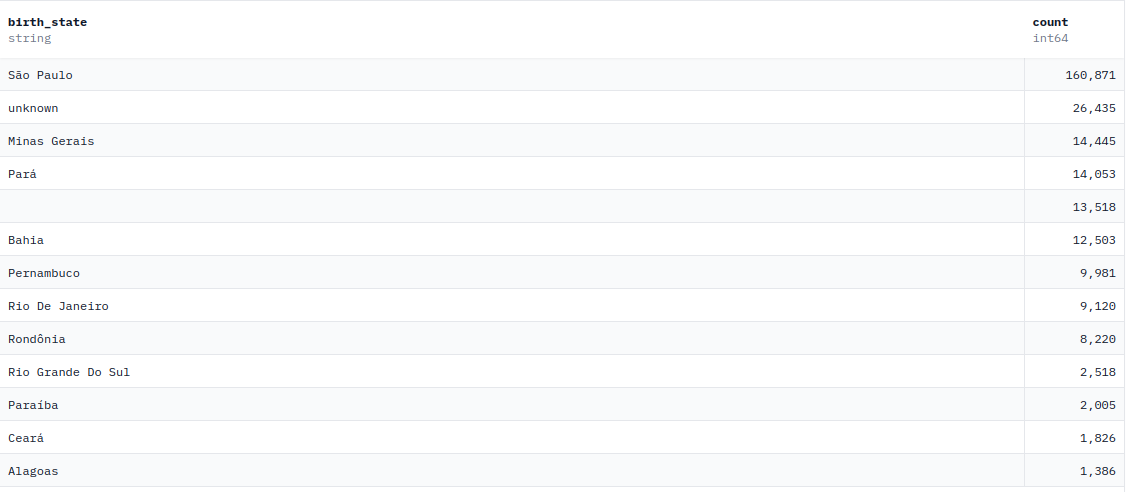

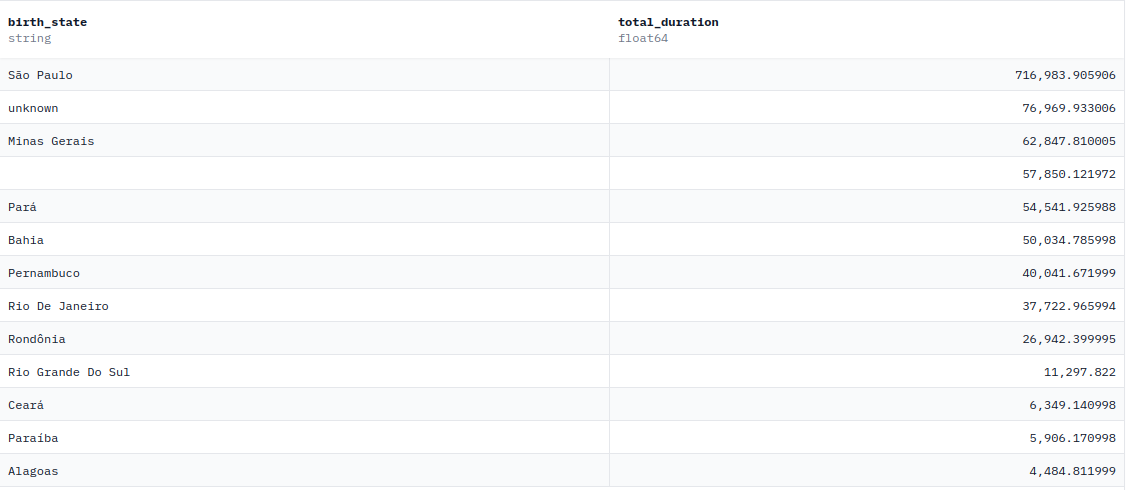

## Validação

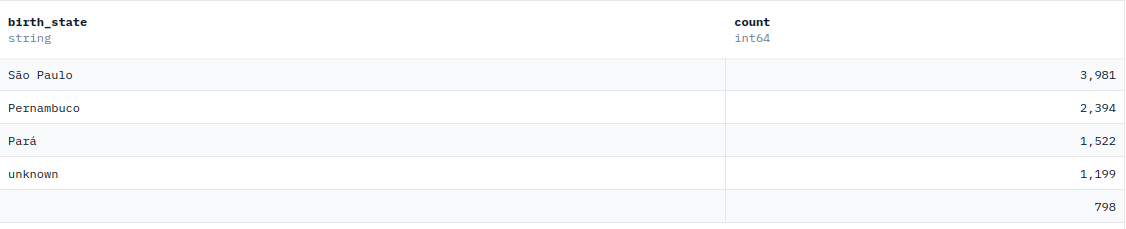

## Teste

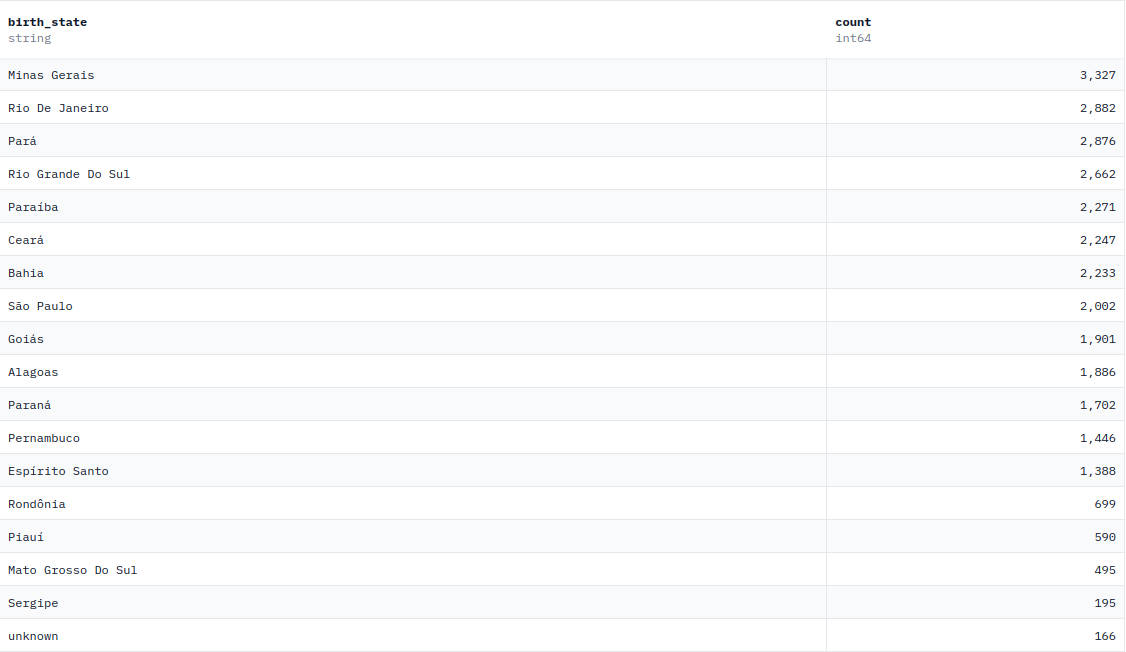

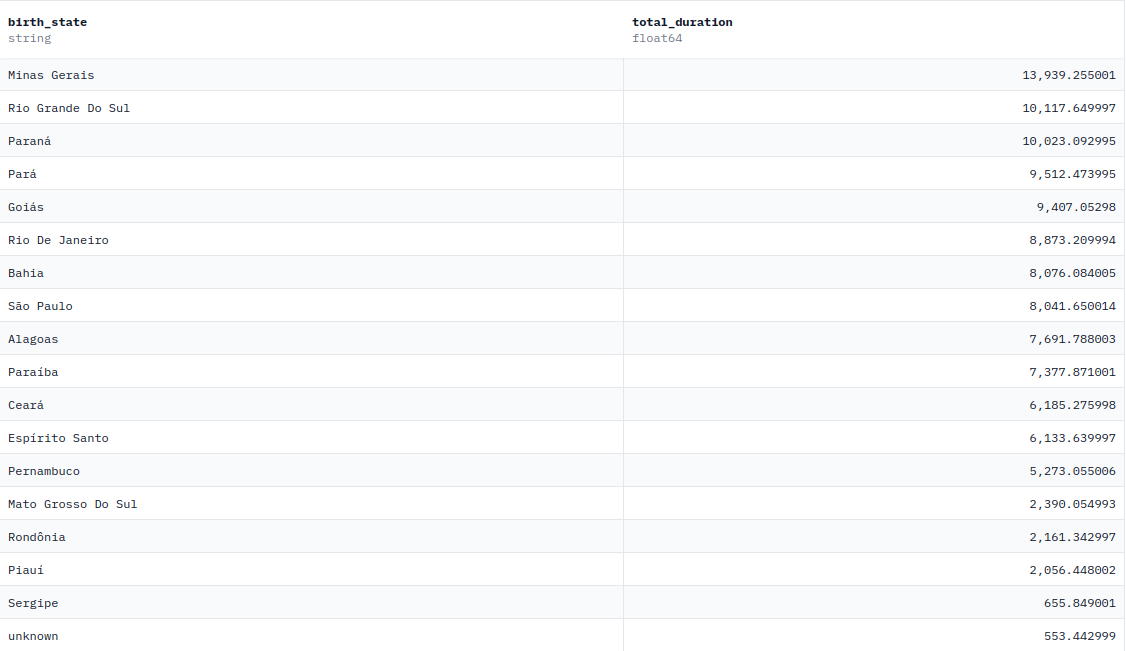